In [1]:
import numpy as np
import pandas as pd
import random

In [2]:
n_trials = nrows = 1_000_000
n_dice = ncols = 4
rolls = np.random.choice([1,2,3,4,5,6], n_trials * n_dice).reshape(nrows, ncols)
rolls = pd.DataFrame(rolls, columns={0,1,2,'lucky_number'})
rolls


,0,1,2,lucky_number
0,5,5,2,1
1,4,4,6,5
2,5,3,2,3
3,5,1,1,2
4,3,5,6,1
...,...,...,...,...
999995,6,2,4,5
999996,6,6,6,3
999997,4,1,2,1
999998,4,1,3,4


In [3]:
rolls['match_0'] = rolls[0]==rolls['lucky_number']
rolls['match_1'] = rolls[1]==rolls['lucky_number']
rolls['match_2'] = rolls[2]==rolls['lucky_number']


rolls.sample(10)

,0,1,2,lucky_number,match_0,match_1,match_2
236582,6,3,3,1,False,False,False
953565,4,2,1,6,False,False,False
65620,3,2,6,5,False,False,False
188737,6,1,2,5,False,False,False
384901,1,6,1,1,True,False,True
520487,1,6,3,3,False,False,True
915331,1,4,1,3,False,False,False
935342,4,6,3,2,False,False,False
645666,2,6,1,5,False,False,False
973726,1,3,4,3,False,True,False


In [14]:
rolls['matches'] = rolls.select_dtypes(include=['bool']).sum(axis=1).astype(int)
rolls['winnings'] = rolls.matches - 1
rolls.head(20)

,0,1,2,lucky_number,match_0,match_1,match_2,matches,winnings
0,5,5,2,1,False,False,False,0,-1
1,4,4,6,5,False,False,False,0,-1
2,5,3,2,3,False,True,False,1,0
3,5,1,1,2,False,False,False,0,-1
4,3,5,6,1,False,False,False,0,-1
5,4,6,2,6,False,True,False,1,0
6,6,5,4,6,True,False,False,1,0
7,1,5,1,2,False,False,False,0,-1
8,5,6,1,4,False,False,False,0,-1
9,2,2,5,2,True,True,False,2,1


In [5]:
rolls.matches.value_counts()

0    578829
1    346771
2     69724
3      4676
Name: matches, dtype: int64

### What are your chances of getting an outcome payout of $2? (where we earned 3 on the 1 ante)

In [6]:
(rolls.matches == 3.0).mean()

0.004676

### What are your chances of getting an payout of $1?

In [7]:
(rolls.matches == 2).mean()

0.069724

### What are your chances of getting a payout of 0 (where you ante 1 and win $1)?

In [8]:
(rolls.matches == 1).mean()

0.346771

### What are your chances of getting a payout of -$1 where you ante up, but don't win anything?

In [9]:
(rolls.matches == 0).mean()

0.578829

### What is the average cost/gain per game? (think of averaging the total payout calculation across all simulations)

In [10]:
cost_per_game = (rolls.matches == 3).mean() * 2 + (rolls.matches == 2).mean() - (rolls.matches == 0).mean()

cost_per_game

-0.49975300000000006

### Chart out a histogram of all the outcomes of those 1,000,000 games

<AxesSubplot:>

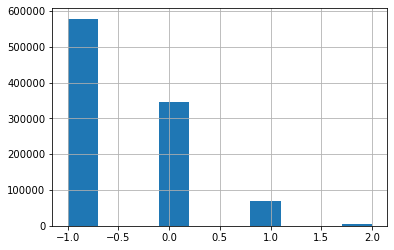

In [11]:
rolls.winnings.hist()

### Is this really a fair game of 1/6 + 1/6 + 1/6 odds?

In [12]:
#your overall chance of winning anything at all is less than 43%

### If you play 1,000,000 games in a row, what are your winnings/losses?

In [13]:
round(cost_per_game * 1_000_000,2)

-499753.0